<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/2s2024/An%C3%A1lise%20de%20Dados/Aula_09_Matplotlib_dispersao_relacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


# **Visualização de dados - Gráficos de dispersão e relações entre colunas**

Nesta aula, vamos aprender como usar as bibliotecas Matplotlib e Seaborn para criar gráficos que ilustram tanto a dispersão dos dados quanto as relações entre colunas. Veremos, então, dois tipos de gráficos:

- Gráfico de dispersão (scatter plot)
- Heatmaps


Para ilustrar os comandos dessa aula, vamos utilizar novamente o conjunto de dados [Bike Sharing](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_bike_sharing_day.csv')
dados

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Relembrando - Gráficos de linha

Como visto na última aula, os gráficos de linha são frequentemente usados para ilustrar funções ou séries temporais. Ou seja, é um gráfico que proporciona uma boa visualização de grandezas que evoluem ao longo do tempo.

Veja, por exemplo, os gráficos abaixo que ilustram (i) a evolução do número de bicicletas alugadas ocasionalmente ao longo dos anos de 2011 e 2012, (ii) a temperatura normalizada e (iii) a evolução do número de bicicletas alugadas por pessoas registradas ao longo dos anos de 2011 e 2012.

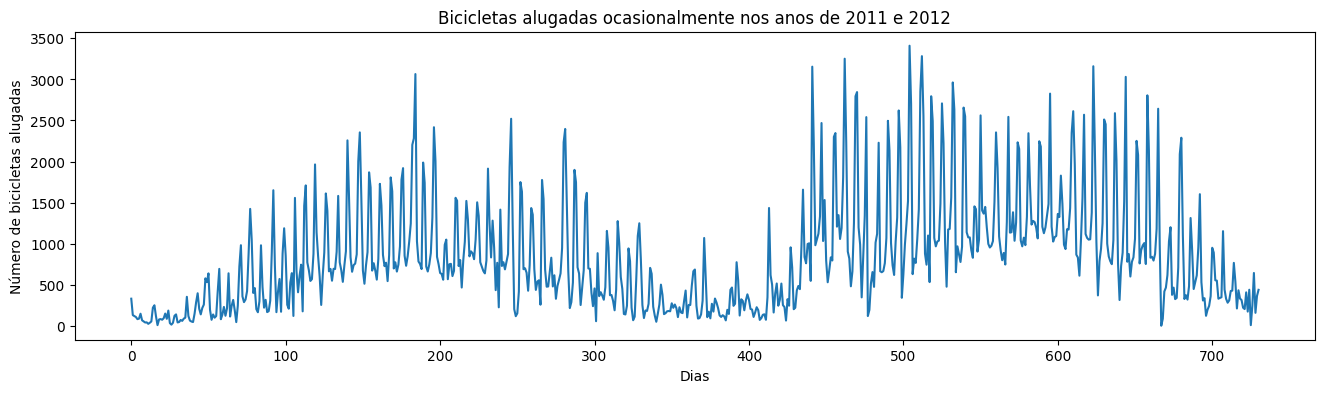

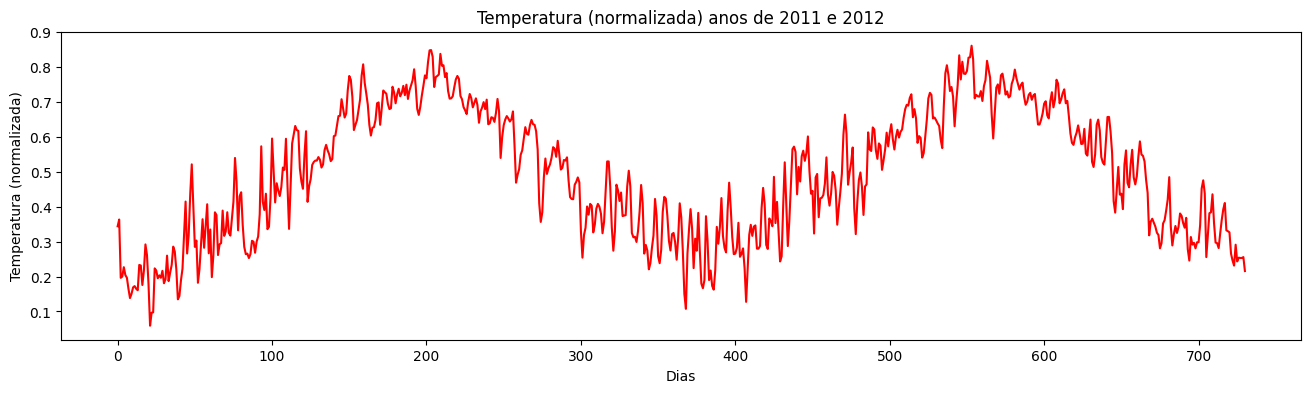

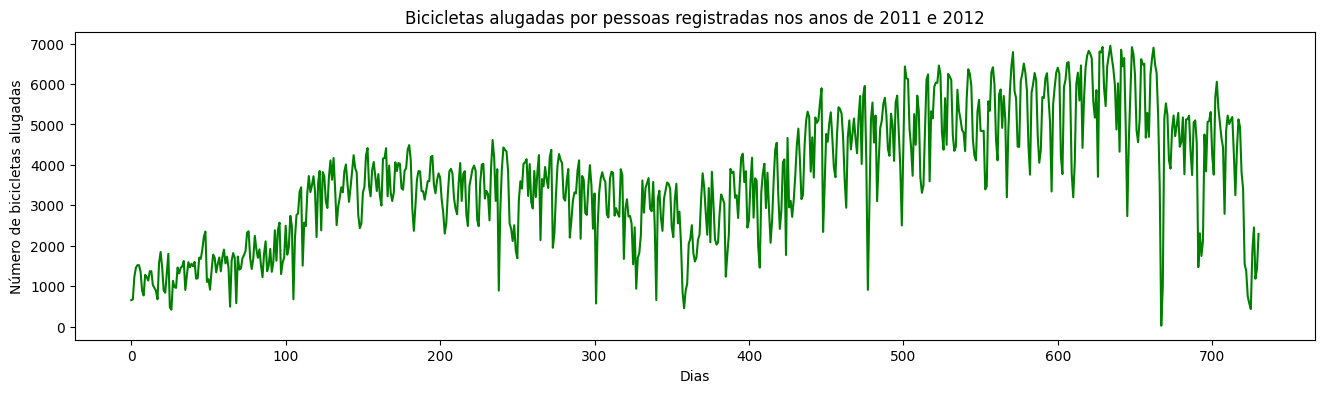

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,len(dados),1)

plt.figure(figsize=(16,4))
plt.plot(x, dados.casual)

plt.title('Bicicletas alugadas ocasionalmente nos anos de 2011 e 2012')
plt.xlabel('Dias')
plt.ylabel('Número de bicicletas alugadas')

plt.show()

x = np.arange(0,len(dados),1)

plt.figure(figsize=(16,4))
plt.plot(x, dados.temp, '-r')

plt.title('Temperatura (normalizada) anos de 2011 e 2012')
plt.xlabel('Dias')
plt.ylabel('Temperatura (normalizada)')

plt.show()

x = np.arange(0,len(dados),1)

plt.figure(figsize=(16,4))
plt.plot(x, dados.registered, '-g')

plt.title('Bicicletas alugadas por pessoas registradas nos anos de 2011 e 2012')
plt.xlabel('Dias')
plt.ylabel('Número de bicicletas alugadas')

plt.show()

É possível notar uma relação positiva entre a variação da temperatura com a variação de bicicletas alugadas (seja ocasionalmente ou por pessoas registradas). Para melhor visualizar essa relação, podes usar gráficos de dispersão (ou Scatter plots).

# Gráficos de dispersão ou scatter plots

Como mencionado, o gráfico de dispersão é muito útil para analisar a relação entre duas variáveis quantitativas. Com ele, podemos visualizar se há uma relação positiva, negativa ou se não há relação entre as variáveis.

Veja abaixo o exemplo com os gráficos apresentados anteriormente.

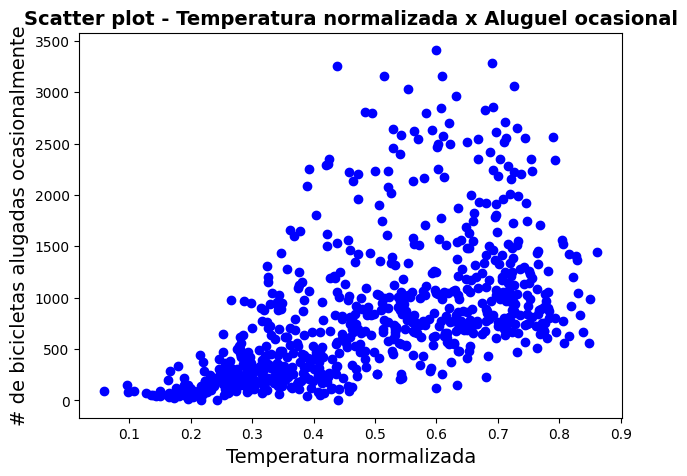

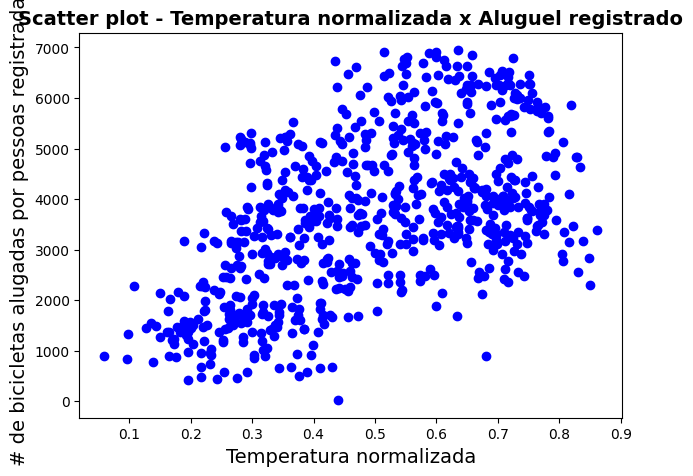

In [ ]:
plt.figure(figsize=(7,5))

plt.scatter(dados.temp, dados.casual, c="blue")
plt.title('Scatter plot - Temperatura normalizada x Aluguel ocasional', fontsize=14, weight='bold')
plt.ylabel("# de bicicletas alugadas ocasionalmente", fontsize=14)
plt.xlabel("Temperatura normalizada", fontsize=14)
plt.show()

plt.figure(figsize=(7,5))

plt.scatter(dados.temp, dados.registered, c="blue")
plt.title('Scatter plot - Temperatura normalizada x Aluguel registrado', fontsize=14, weight='bold')
plt.ylabel("# de bicicletas alugadas por pessoas registradas", fontsize=14)
plt.xlabel("Temperatura normalizada", fontsize=14)
plt.show()

Veja que em ambos os gráficos de dispersão, há uma certa tendência crescente entre a temperatura e o número de bicicletas alugadas.

Em algumas aplicações, é interessante avaliar relações entre atributos condicionados a uma outra variável. Por exemplo, poderíamos plotar o gráfico de dispersão para visualizar a relação entre temperatura e bicicletas alugadas para diferentes estações do ano.

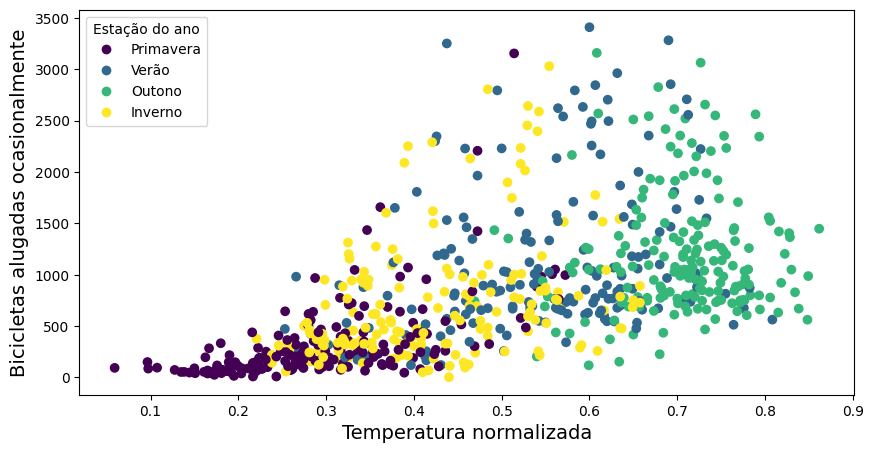

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
g=ax.scatter(dados.temp,dados.casual,c=dados.season)

handles,_ =g.legend_elements( )
legend2 = ax.legend(handles, ["Primavera","Verão", "Outono", "Inverno"], loc="upper left", title="Estação do ano")
plt.xlabel("Temperatura normalizada", fontsize=14)
plt.ylabel("Bicicletas alugadas ocasionalmente", fontsize=14)
plt.show()

## Usando a biblioteca Seaborn

Os comandos para o uso da biblioteca Seaborn são bem simples. Para as customizações usando essa biblioteca, consulte o link abaixo:

https://seaborn.pydata.org/generated/seaborn.scatterplot.html


[]

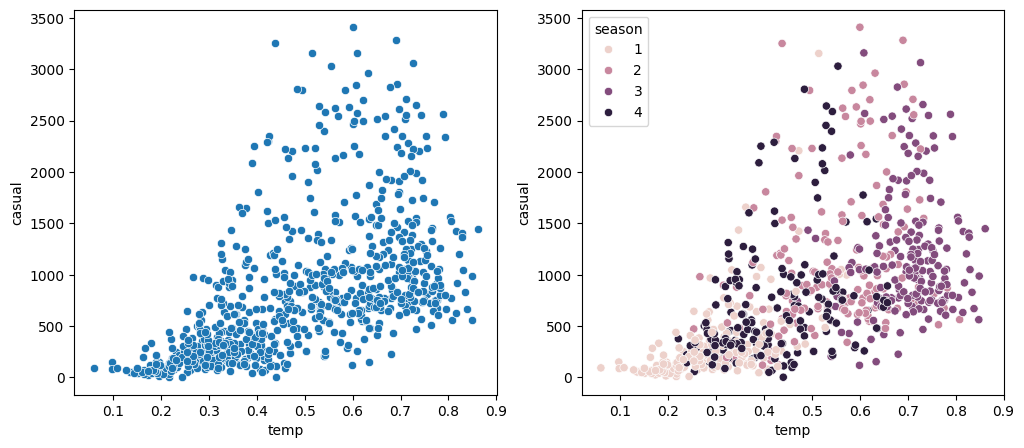

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data = dados, x = 'temp', y = 'casual')

plt.subplot(1,2,2)
sns.scatterplot(data = dados, x = 'temp', y = 'casual', hue="season")
plt.plot()

# Heatmaps

Perceba que nos gráficos de dispersão mostrados anteriormente, conseguimos visualizar uma relação entre variáveis mas sem uma medida que quantifique tal relação. Uma das medidas mais comuns seria o coeficiente de correlação de Pearson que, em resumo, mede a correlação (linear) entre variáveis.

No Pandas, podemos calcular a correlação entre variáveis numéricas de um `DataFrame` usando o comando `df.corr()`. No entanto, o conjunto de dados `df` deve ter apenas variáveis numéricas. Caso contrário, o comando apresentará erro. Veja no exemplo a seguir.

In [ ]:
dados2 = dados.drop('instant', axis=1).select_dtypes(include='number')
dados2.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


Uma forma mais interessante de visualizar as correlações é através do gráfico Heatmap (ou mapa de calor). Esses mapas ajudam a compreender melhor como cada variável se relaciona.

Veja abaixo como ele é construído usando a biblioteca Seaborn.

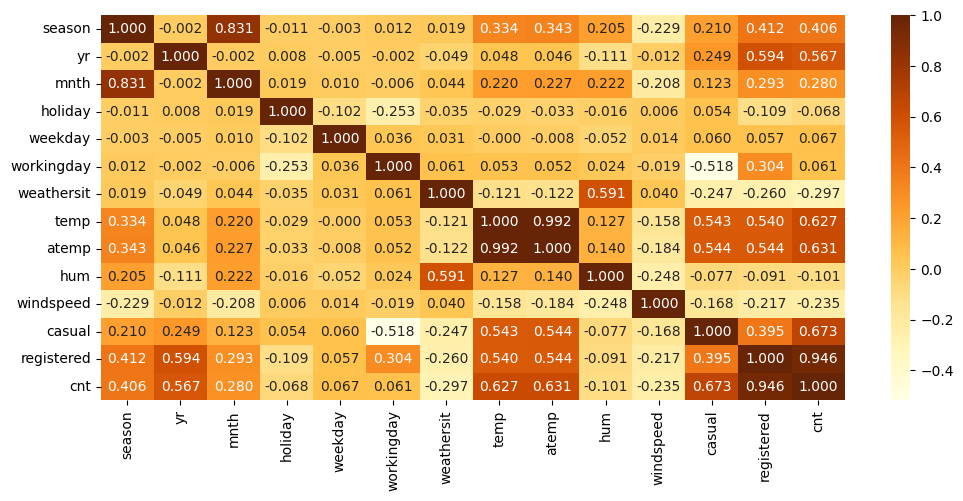

In [ ]:
plt.figure(figsize=(12,5))

sns.heatmap(dados2.corr(),cmap="YlOrBr", annot = True, fmt=".3f");

Além de ser usado para apresentar medidas de similaridade entra variáveis (como a correlação), o heatmap também pode ser usado para apresentar (e comparar) distribuição de dados.

Veja o exemplo seguinte que usa como conjunto de dados [European energy](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/energy_types.csv)

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/energy_types.csv", sep = ',')
df = df.dropna()
df

,country,country_name,type,level,2016,2017,2018
0,BE,Belgium,Conventional thermal,Level 1,30728.0,31316.0,30092.635
1,BE,Belgium,Nuclear,Level 1,41430.0,40128.5,26995.628
2,BE,Belgium,Hydro,Level 1,1476.0,1360.9,1239.248
3,BE,Belgium,Pumped hydro power,Level 2,1110.0,1093.2,983.190
4,BE,Belgium,Wind,Level 1,5340.0,6387.9,7177.346
...,...,...,...,...,...,...,...
291,GE,Georgia,Pumped hydro power,Level 2,0.0,0.0,0.000
292,GE,Georgia,Wind,Level 1,9.0,87.7,84.226
293,GE,Georgia,Solar,Level 1,0.0,0.0,0.000
294,GE,Georgia,Geothermal,Level 1,0.0,0.0,0.000


In [ ]:
prod = df.pivot(index=['country_name'], columns=['type'], values='2017')
prod

type,Conventional thermal,Geothermal,Hydro,Nuclear,Other,Pumped hydro power,Solar,Wind
country_name,,,,,,,,
Albania,0.000,0.000,4496.607,0.000,0.000,0.000,1.200,0.000
Austria,20135.846,0.086,40098.554,0.000,11.868,3683.851,1204.311,6239.497
Belgium,31316.000,0.000,1360.900,40128.500,490.900,1093.200,3264.300,6387.900
Bosnia & Herzegovina,11250.000,0.000,3968.000,0.000,0.000,197.000,21.000,0.000
Bulgaria,20234.209,0.000,3458.015,14718.368,33.882,603.713,1402.766,1504.063
Croatia,4808.000,0.000,5437.800,0.000,0.000,200.300,78.700,1198.400
Cyprus,4394.819,0.000,0.000,0.000,0.000,0.000,172.013,211.448
Czechia,47246.628,0.000,3007.403,26785.600,95.478,1155.492,2168.740,581.917
Denmark,14104.326,0.000,17.871,0.000,0.000,0.000,751.485,14780.000


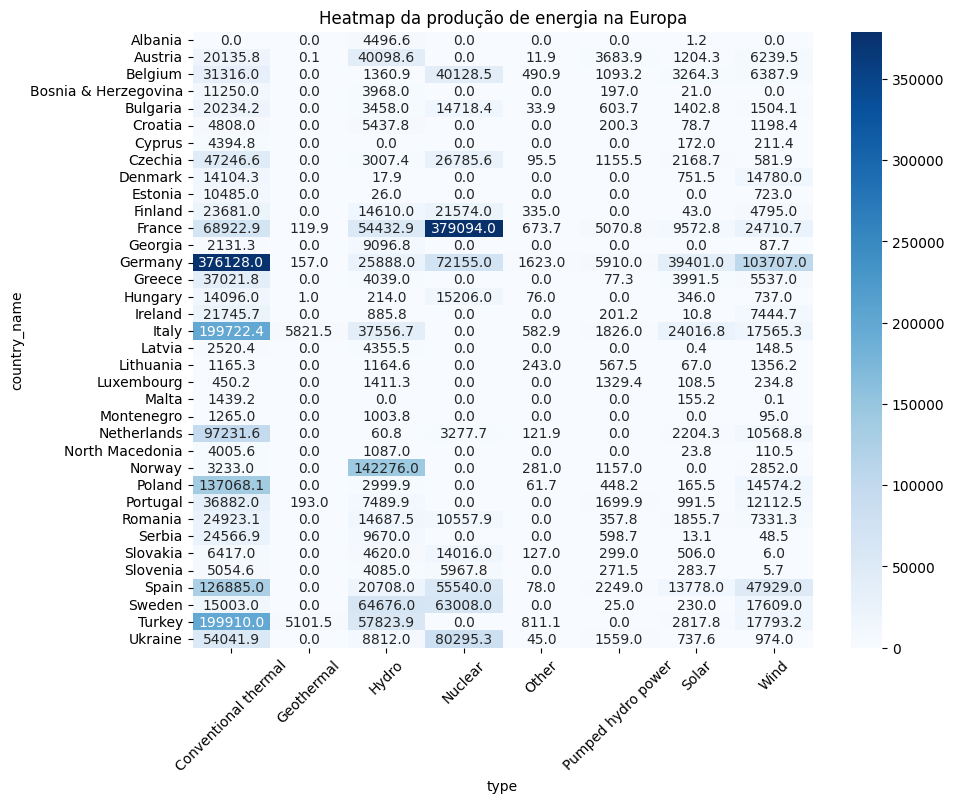

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(prod,cmap="Blues", annot = True, fmt=".1f") #camp: "YlGnBu"; "Greens"; "Blues"
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Heatmap da produção de energia na Europa")
plt.show()

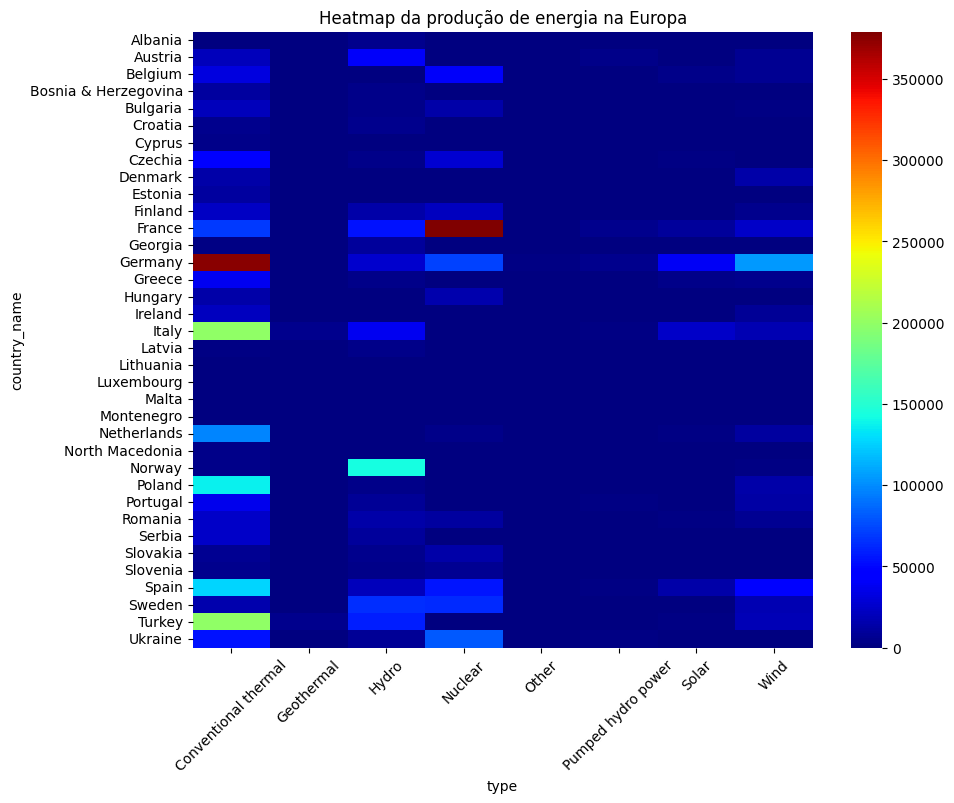

In [ ]:
import matplotlib as mpl #Selecionar as cores pro gráfico de temperatura
cmap2=mpl.cm.jet

plt.figure(figsize=(10,8))

sns.heatmap(prod, cmap=cmap2) #camp: "YlGnBu"; "Greens"; "Blues"
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title("Heatmap da produção de energia na Europa")
plt.show()